# BRSM Regression Assignment

### Submitted by - Ashish Chokhani

In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan


## PART 1

In [378]:
data = pd.read_csv('housing.csv')
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

### Visualizing correlations between variables in the data set

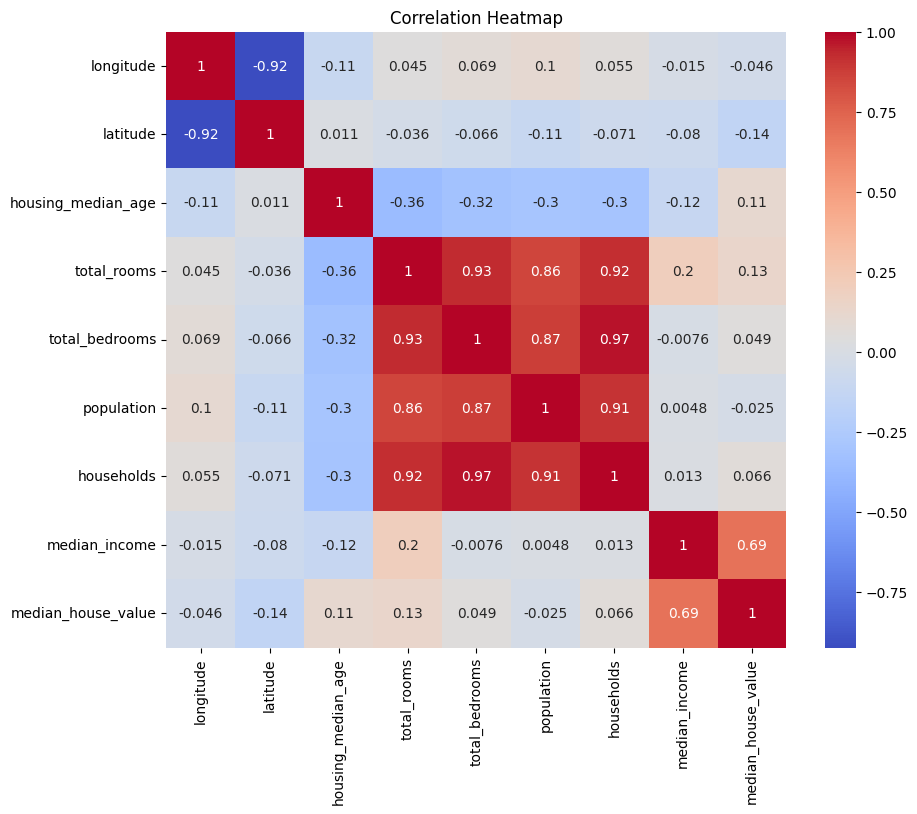

In [379]:
# Drop the 'ocean_proximity' categorical column
data = data.drop(columns='ocean_proximity')

# Fill missing values in 'total_bedrooms' with its median
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/Users/ashishchokhani/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/hw/qr7q48fs1kj7vhc9lwbs3x2h0000gn/T/ipykernel_50691/4168228908.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


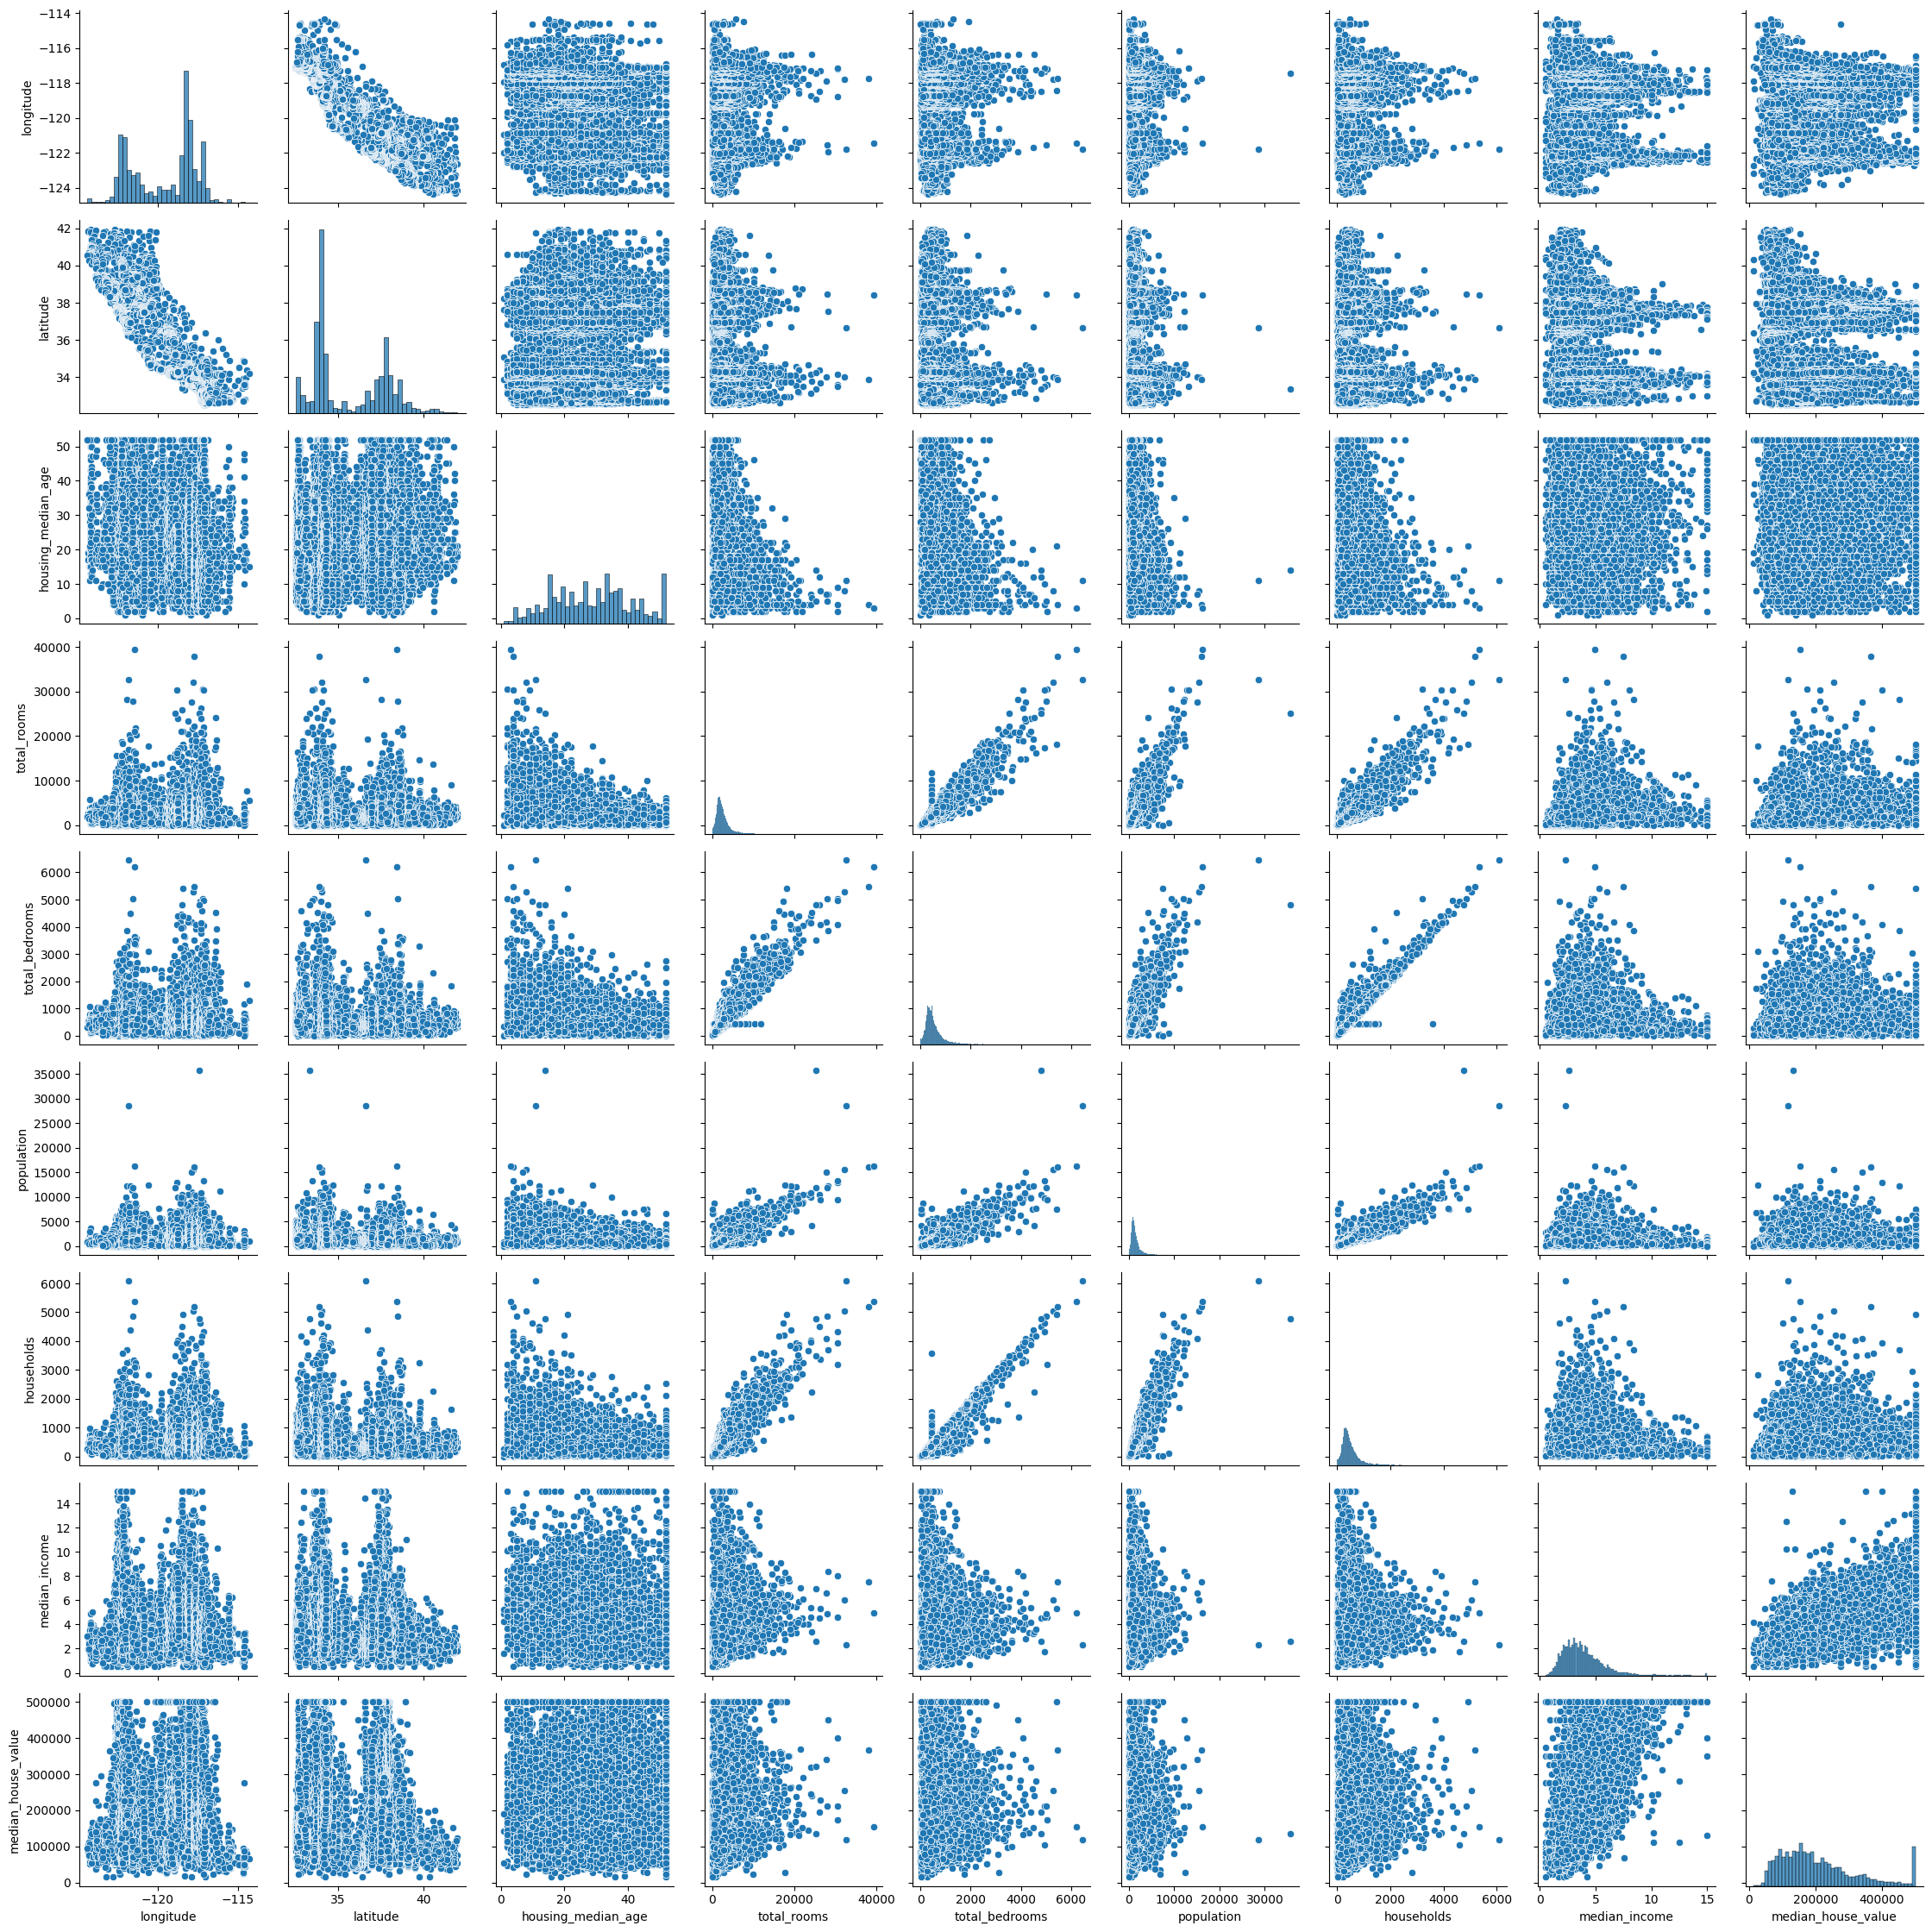

In [380]:
# Pairplot to visualize pairwise relationships in the dataset
sns.pairplot(data)

# Use tight_layout *before* show to avoid overlap issues
plt.tight_layout()
plt.show()

### Picking 2 linear regression models to predict median house value

#### Model 1

In [381]:
# Define feature matrix X1 and target variable y1
X1 = data[['latitude', 'longitude', 'total_rooms', 'population', 'median_income', 'housing_median_age']]
y1 = data['median_house_value']

# Add intercept (constant) term to the model
X1 = sm.add_constant(X1)

# Fit an Ordinary Least Squares (OLS) regression model
model1 = sm.OLS(y1, X1).fit()

# Print model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5408.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:04:27   Log-Likelihood:            -2.6012e+05
No. Observations:               20640   AIC:                         5.202e+05
Df Residuals:                   20633   BIC:                         5.203e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.981e+06   6.29

### Predicting Median House Value

Use the following regression formula to estimate the median house value from the California Housing dataset:

```
median_house_value ≈ 
    -3,981,000 
    - 47,870 × latitude 
    - 47,880 × longitude 
    + 15.07 × total_rooms 
    - 25.36 × population 
    + 34,260 × median_income 
    + 1117.65 × housing_median_age
```

#### Model 2

In [382]:
# Define independent variables (features)
X2 = data[['longitude', 'households', 'median_income', 'housing_median_age', 'population']]

# Define dependent variable (target)
y2 = data['median_house_value']

# Add constant term to the predictors
X2 = sm.add_constant(X2)

# Fit OLS regression model
model2 = sm.OLS(y2, X2).fit()

# Display regression results summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     5146.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:04:28   Log-Likelihood:            -2.6151e+05
No. Observations:               20640   AIC:                         5.230e+05
Df Residuals:                   20634   BIC:                         5.231e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.405e+04   3.24

### Predicting Median House Value

Use the following regression formula to estimate the median house value:

```
median_house_value ≈ 
    -14,050 
    + 152.05 × longitude 
    + 152.87 × households 
    + 43,100 × median_income 
    + 2002.91 × housing_median_age 
    - 43.12 × population
```

### Checking for collinearity using VIF to remove highly correlated variables from the models

#### Model 1

In [383]:
print('Model 1:')
vif = pd.DataFrame()
vif["Feature"] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))]
print(vif)
print()

Model 1:
              Feature           VIF
0               const  15773.096020
1            latitude      8.317464
2           longitude      8.194382
3         total_rooms      4.723628
4          population      4.477583
5       median_income      1.309105
6  housing_median_age      1.257677



#### Model 2

In [384]:
print('Model 2:')

# Create a DataFrame to hold VIF values
vif = pd.DataFrame()
vif["Feature"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Display VIFs
print(vif)

Model 2:
              Feature          VIF
0               const  3645.049335
1           longitude     1.026323
2          households     5.741257
3       median_income     1.016179
4  housing_median_age     1.130596
5          population     5.744076


#### Removing highly correlated variables from the models (having VIF>5)

In [385]:
# Model 1 variables
X1 = data[['total_rooms', 'population', 'median_income', 'housing_median_age']]
y1 = data['median_house_value']

# Model 2 variables
X2 = data[['longitude', 'median_income', 'housing_median_age']]
y2 = data['median_house_value']

#### Fitting Linear Regression on modified data

In [386]:
# Fit OLS models
model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                          3.969e+04
Date:                Wed, 09 Apr 2025   Prob (F-statistic):                        0.00
Time:                        20:04:28   Log-Likelihood:                     -2.6239e+05
No. Observations:               20640   AIC:                                  5.248e+05
Df Residuals:                   20636   BIC:                                  5.248e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### Plotting the distribution of the residuals against the fitted values to check for heteroscedasticity

#### Model 1

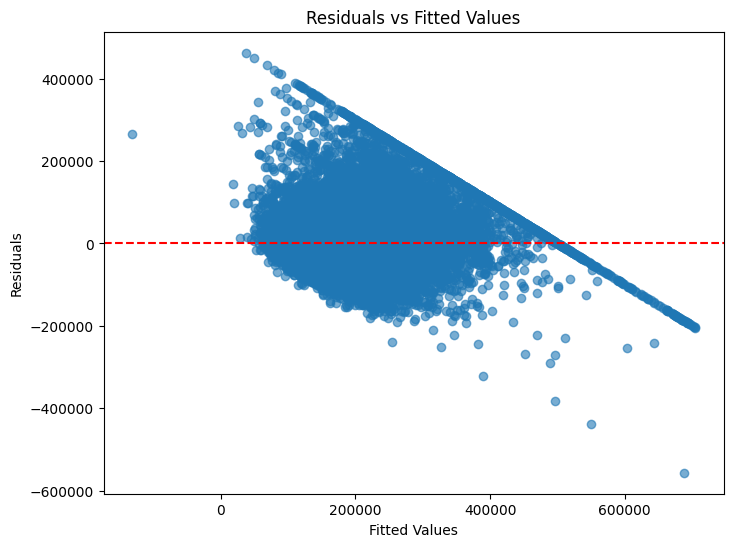

In [387]:
# Get residuals from model1
residuals = model1.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

#### Model 2

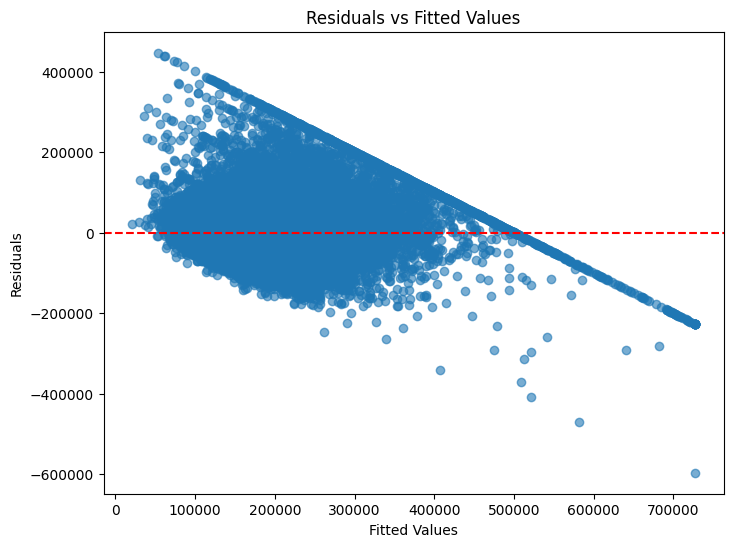

In [388]:
# Get residuals from model2
residuals = model2.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model2.fittedvalues, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Testing for heteroscedasticity using ncvTest or equivalent test (het_breuschpagan)

#### Model 1

In [389]:
# Add constant (if not already added)
X1 = sm.add_constant(X1)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model1.resid, X1)
bp_p_value = bp_test[1]

print("Breusch-Pagan Test p-value:", bp_p_value)

# Set significance level
alpha = 0.05

# Interpret result
if bp_p_value < alpha:
    print("There is evidence of heteroscedasticity in the model.")
else:
    print("There is no significant evidence of heteroscedasticity in the model.")

Breusch-Pagan Test p-value: 8.169940421878558e-82
There is evidence of heteroscedasticity in the model.


#### Model 2

In [390]:
X2 = sm.add_constant(X2)
bp_test = het_breuschpagan(model2.resid, X2)
bp_p_value = bp_test[1]
print("Breusch-Pagan Test p-value:", bp_p_value)

alpha = 0.05 
if bp_p_value < alpha:
    print("There is evidence of heteroscedasticity in the model.")
else:
    print("There is no significant evidence of heteroscedasticity in the model.")



Breusch-Pagan Test p-value: 9.634879417627964e-85
There is evidence of heteroscedasticity in the model.


There is heteroscedasticity in the model.

Now, considering only that data which has median house value < 40000

In [391]:
data = data[data['median_house_value'] <= 40000]

X1 = data[['total_rooms','population','median_income','housing_median_age']]
y1 = data['median_house_value']

X2 = data[['longitude','median_income','housing_median_age']]
y2 = data['median_house_value']

model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              59.06
Date:                Wed, 09 Apr 2025   Prob (F-statistic):                    2.97e-16
Time:                        20:04:29   Log-Likelihood:                         -477.18
No. Observations:                  44   AIC:                                      962.4
Df Residuals:                      40   BIC:                                      969.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

#### Again testing for heteroscedasticity

#### Model 1

Breusch-Pagan Test p-value: 0.15701078157378187
There is no significant evidence of heteroscedasticity in the model.


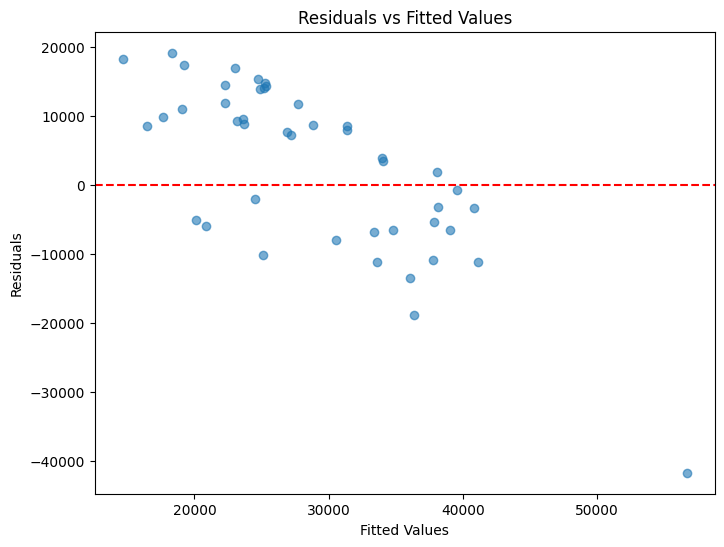

In [392]:
# Add constant again just to be safe
X1 = sm.add_constant(X1, has_constant='add')

# Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(model1.resid, X1)
bp_p_value = bp_test[1]
print("Breusch-Pagan Test p-value:", bp_p_value)

alpha = 0.05
if bp_p_value < alpha:
    print("There is evidence of heteroscedasticity in the model.")
else:
    print("There is no significant evidence of heteroscedasticity in the model.")

# Residuals vs Fitted plot
residuals = model1.resid
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

#### Model 2

Breusch-Pagan Test p-value: 0.9427255209574478
There is no significant evidence of heteroscedasticity in the model.


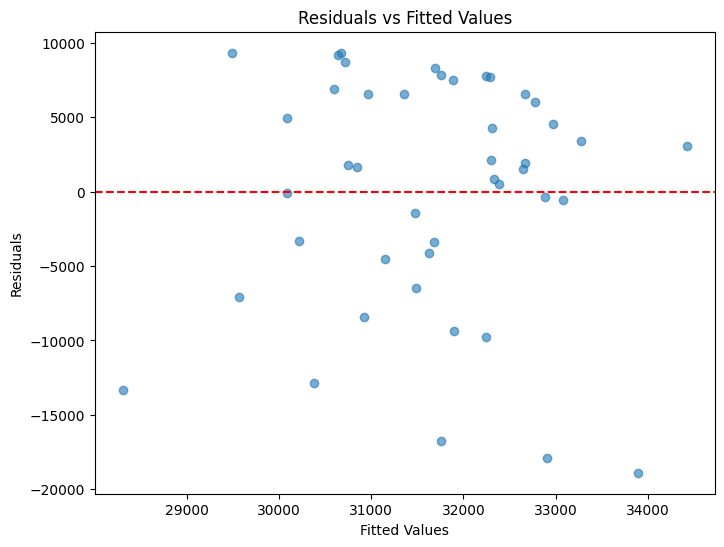

In [393]:
# Ensure constant is added to X2
X2 = sm.add_constant(X2, has_constant='add')

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model2.resid, X2)
bp_p_value = bp_test[1]
print("Breusch-Pagan Test p-value:", bp_p_value)

# Interpretation
alpha = 0.05
if bp_p_value < alpha:
    print("There is evidence of heteroscedasticity in the model.")
else:
    print("There is no significant evidence of heteroscedasticity in the model.")

# Residuals vs Fitted Values plot
residuals = model2.resid
plt.figure(figsize=(8, 6))
plt.scatter(model2.fittedvalues, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Testing for normality of the residuals (using Q-Q plots)

#### Model 1

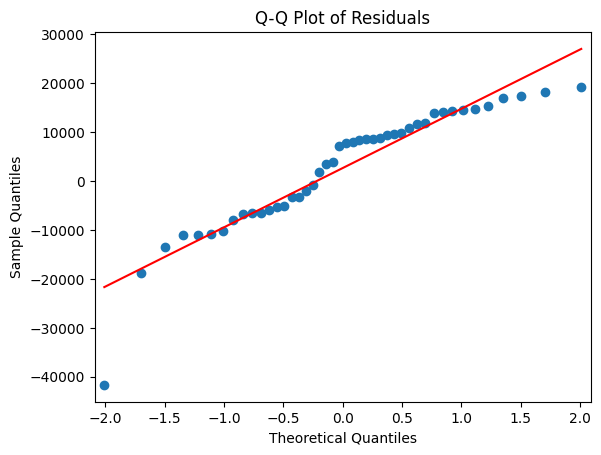

In [394]:
# Q-Q Plot for model1 residuals
sm.qqplot(model1.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Model 2

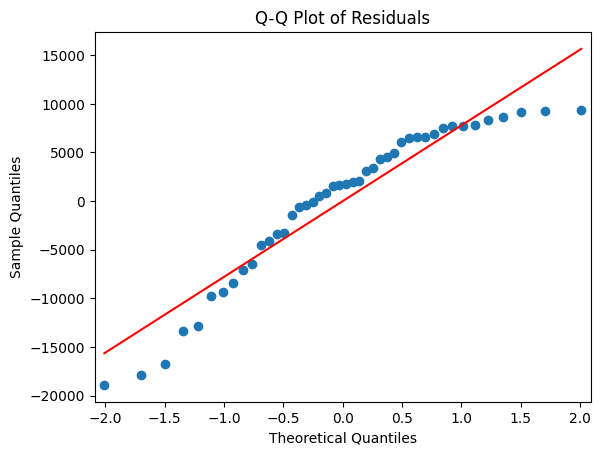

In [395]:
# Q-Q Plot for model2 residuals
sm.qqplot(model2.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

### Comparing the 2 models using AIC and pick the best model

In [396]:
# Compare AIC values
aic_model1 = model1.aic
aic_model2 = model2.aic 

print("AIC for Model 1:", aic_model1)
print("AIC for Model 2:", aic_model2)

# Select the model with lower AIC
best_model = model1  
if aic_model2 < aic_model1:
    best_model = model2

print("\nBest Model Summary:")
print(best_model.summary())

AIC for Model 1: 962.3623975458736
AIC for Model 2: 919.290605098435

Best Model Summary:
                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              226.4
Date:                Wed, 09 Apr 2025   Prob (F-statistic):                    1.55e-25
Time:                        20:04:31   Log-Likelihood:                         -456.65
No. Observations:                  44   AIC:                                      919.3
Df Residuals:                      41   BIC:                                      924.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef 

### Reporting the coefficients of the winning model and their statistics and interpreting the resulting model coefficients.

In [403]:
# Extract model statistics
coefficients = best_model.params
confidence_intervals = best_model.conf_int()
p_values = best_model.pvalues
std_errors = best_model.bse

print("Coefficients and Statistics of the Winning Model:")
for i, coef_name in enumerate(coefficients.index):
    coef_value = coefficients.iloc[i]
    conf_int = confidence_intervals.iloc[i]
    p_value = p_values.iloc[i]
    std_error = std_errors.iloc[i]

    print(f"{coef_name}:")
    print(f"  Coefficient: {coef_value:.4f}")
    print(f"  95% Confidence Interval: [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Standard Error: {std_error:.4f}")

    if p_value < 0.05:
        if coef_value > 0:
            print(f"  ➤ One-unit increase in '{coef_name}' is associated with an increase of {coef_value:.4f} in the target.")
        else:
            print(f"  ➤ One-unit increase in '{coef_name}' is associated with a decrease of {abs(coef_value):.4f} in the target.")
    else:
        print(f"  ➤ Not statistically significant (p ≥ 0.05); '{coef_name}' may not affect the target.")
    print()

Coefficients and Statistics of the Winning Model:
longitude:
  Coefficient: -293.2144
  95% Confidence Interval: [-367.3020, -219.1267]
  p-value: 0.0000
  Standard Error: 36.6854
  ➤ One-unit increase in 'longitude' is associated with a decrease of 293.2144 in the target.

median_income:
  Coefficient: -471.3442
  95% Confidence Interval: [-3466.9203, 2524.2318]
  p-value: 0.7523
  Standard Error: 1483.2955
  ➤ Not statistically significant (p ≥ 0.05); 'median_income' may not affect the target.

housing_median_age:
  Coefficient: -82.2167
  95% Confidence Interval: [-279.0748, 114.6415]
  p-value: 0.4039
  Standard Error: 97.4767
  ➤ Not statistically significant (p ≥ 0.05); 'housing_median_age' may not affect the target.



## PART 2

In [404]:
# Load the dataset named 'binary.csv' located in the current directory
data = pd.read_csv('./binary.csv')

# Display the first 5 rows of the dataframe
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Predicting admission using GRE, GPA, and undergrad institution ranks using Logistic Regression

In [405]:
# Define independent variables and add a constant (intercept term)
X = data[['gre', 'gpa', 'rank']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['admit']

# Build a Generalized Linear Model with a Binomial family (i.e., logistic regression)
model = sm.GLM(y, X, family=sm.families.Binomial())

# Fit the model to the data
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.72
Date:                Wed, 09 Apr 2025   Deviance:                       459.44
Time:                        20:07:58   Pearson chi2:                     399.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09637
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4495      1.133     -3.045      0.0

### Reporting the Statistics, Confidence Intervals, etc for the logistic regression and Interpreting the Results


In [406]:
# Get 95% confidence intervals for the coefficients
conf_int = result.conf_int()
conf_int.columns = ['2.5%', '97.5%']
print("Confidence Intervals:")
print(conf_int)

# Calculate odds ratios by exponentiating the coefficients
odds_ratios = np.exp(result.params)
odds_ratios = pd.DataFrame(odds_ratios, columns=['Odds Ratio'])
print("\nOdds Ratios:")
print(odds_ratios)

Confidence Intervals:
           2.5%     97.5%
const -5.669886 -1.229211
gre    0.000154  0.004434
gpa    0.135157  1.418870
rank  -0.809215 -0.310847

Odds Ratios:
       Odds Ratio
const    0.031760
gre      1.002297
gpa      2.174967
rank     0.571191


### Model Interpretation (Without Interaction Term)

After fitting the logistic regression model (without interaction), the **odds ratios** are:

- **GPA:** 2.17  
- **GRE:** 1.00  
- **Rank:** 0.57  

This implies the following:

- **GPA** has a **positive association** with admission — a higher GPA significantly increases the odds of being admitted.
- **Rank** (with lower values indicating better-ranked institutions) has a **negative association** — applicants from lower-ranked institutions are less likely to be admitted.
- **GRE scores** have **no significant association** with admission — the odds ratio of 1.00 indicates no effect.

---

### Conclusion:

**GPA is the most significant predictor** of admission, followed by the **rank** of the undergraduate institution. **GRE scores show no or minimal impact** on the likelihood of admission based on the model results.

### Testing an Interaction Effect by Including a GPA × Rank Term in the Model

In [407]:
# Create interaction term between GPA and Rank
data['gpa_rank_interaction'] = data['gpa'] * data['rank']

# Define features and target variable
X_interaction = data[['gpa', 'gre', 'rank', 'gpa_rank_interaction']]
X_interaction = sm.add_constant(X_interaction)
y = data['admit']

# Fit logistic regression model with interaction term
model_interaction = sm.GLM(y, X_interaction, family=sm.families.Binomial())
result_interaction = model_interaction.fit()

# Display model summary
print(result_interaction.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      395
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.67
Date:                Wed, 09 Apr 2025   Deviance:                       459.33
Time:                        20:10:29   Pearson chi2:                     399.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09661
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.3447 

In [408]:
# Compute 95% Confidence Intervals for coefficients
conf_int_interaction = result_interaction.conf_int()
conf_int_interaction.columns = ['2.5%', '97.5%']
print("Confidence Intervals (with Interaction Term):")
print(conf_int_interaction)

# Compute Odds Ratios from model coefficients
odds_ratios_interaction = np.exp(result_interaction.params)
odds_ratios_interaction = pd.DataFrame(odds_ratios_interaction, columns=['Odds Ratio (with Interaction)'])
print("\nOdds Ratios (with Interaction Term):")
print(odds_ratios_interaction)

Confidence Intervals (with Interaction Term):
                           2.5%     97.5%
const                -10.161326  1.471949
gpa                   -0.649768  2.723070
gre                    0.000157  0.004443
rank                  -2.528162  2.193308
gpa_rank_interaction  -0.797958  0.569509

Odds Ratios (with Interaction Term):
                      Odds Ratio (with Interaction)
const                                      0.012976
gpa                                        2.819759
gre                                        1.002303
rank                                       0.845838
gpa_rank_interaction                       0.892058


### Model Interpretation with GPA × Rank Interaction Term

After including the GPA and rank interaction term, the **odds ratios** are:

- **GPA:** 2.81  
- **GRE:** 1.00  
- **Rank:** 0.84  
- **GPA × Rank Interaction:** 0.89  

This implies the following:

- **GPA** has a **positive association** with admission — higher GPA increases the odds of admission.
- **Rank** (with lower values indicating better-ranked institutions) has a **negative association** — applicants from lower-ranked institutions have reduced odds of admission.
- The **GPA × Rank interaction term** also has a **negative association**, indicating that the impact of GPA on admission **depends on the institution's rank** — specifically, GPA has a **weaker effect** in lower-ranked institutions.
- **GRE scores** remain **insignificant**, showing no meaningful impact on admission decisions.

---

### Conclusion:

With the interaction term included, **GPA emerges as the most significant predictor** of admission. The significant interaction effect suggests that **GPA’s influence on admission is not uniform** — it varies depending on the undergraduate institution's rank. Meanwhile, **GRE scores continue to show no predictive power** in this model.